In [81]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [82]:
df=pd.read_excel('/content/glass.xlsx')#loading dataset

In [83]:
df.head()#first 5 rows of dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Exploratory Data Analysis (EDA)**

In [84]:
df.info()#checking datatypes,null values,number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [85]:
df.isna().sum()#checking null values

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


<Axes: >

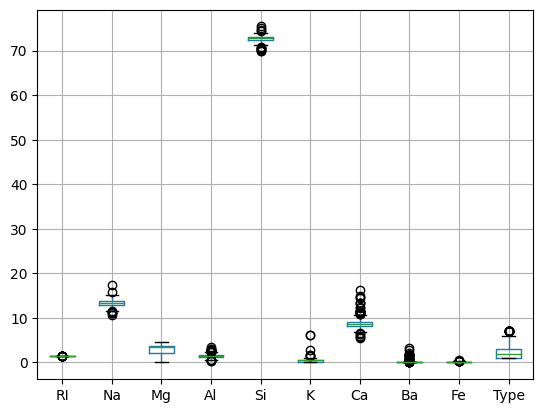

In [86]:
df.boxplot()#checking for outliers

In [87]:
df.describe()#summary statistics of data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# **Data Visualization**

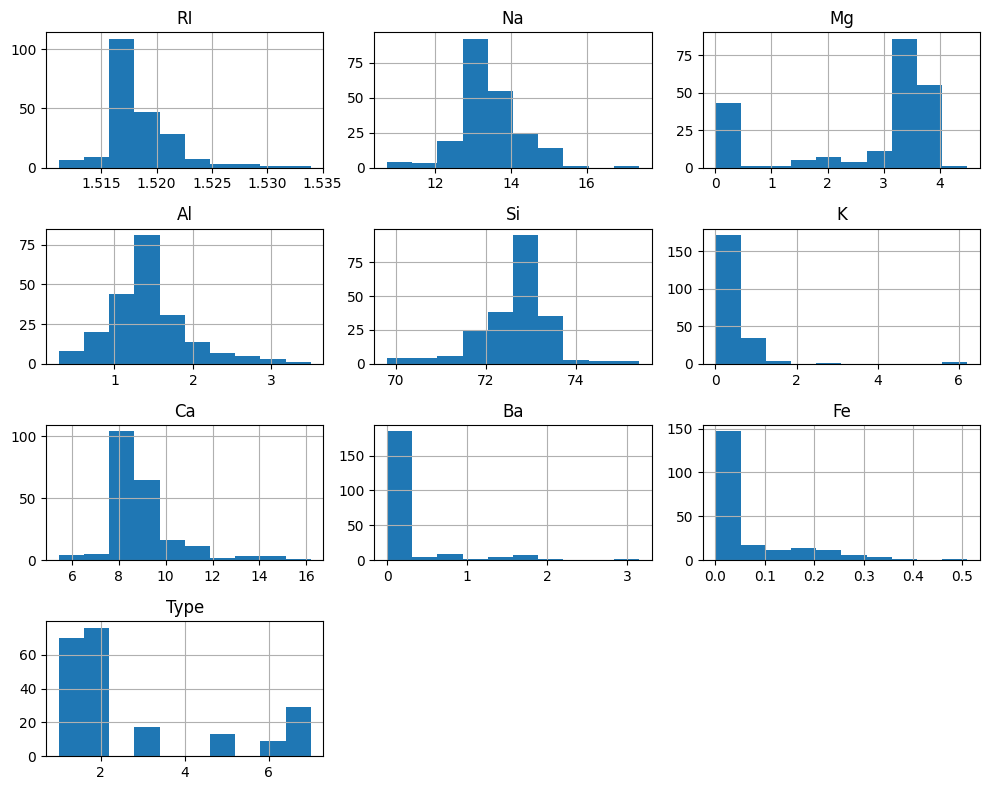

In [88]:
df.hist(figsize=(10, 8))#histogram of data
plt.tight_layout()

<Axes: >

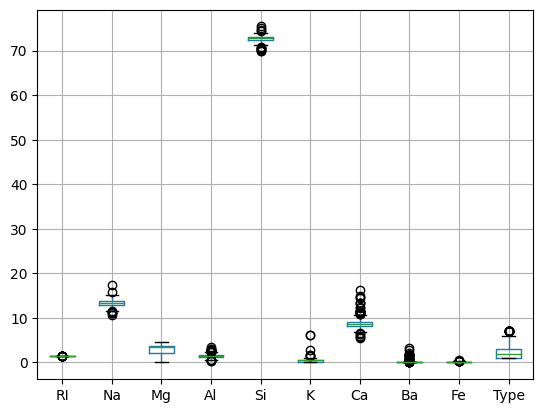

In [89]:
df.boxplot()#boxplot of data

Text(0.5, 1.0, 'Correlation Matrix')

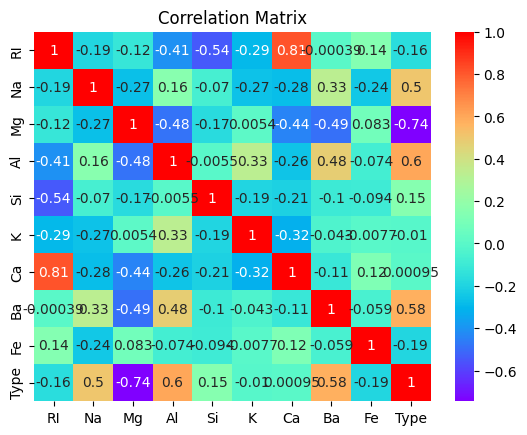

In [90]:
corr_matrix=df.corr()#correlation matrix of data
sns.heatmap(corr_matrix,annot=True,cmap='rainbow')
plt.title('Correlation Matrix')

# **Data Preprocessing**

In [91]:
df.isna().sum()#no null values in data

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [92]:
def cap_upper_outliers(df, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    df[column] = df[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']  # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)


<Axes: >

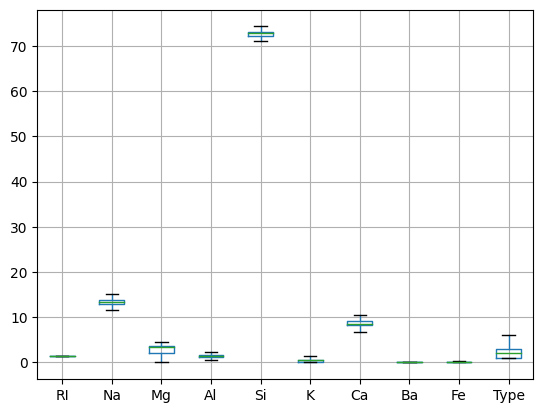

In [93]:
df.boxplot()#checking outliers all are cleared

Reason behind imputation is to cover the outliers and also removal or deleting  of outliers will make lot of changes and also important data may lost.

There are no categorical variables.

In [94]:
from sklearn.preprocessing import StandardScaler#standardization of data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [95]:
df_scaled#scaled data

array([[ 1.20149683,  0.31687123,  1.25463857, ...,  0.        ,
        -0.61909102, -0.89487798],
       [-0.23426899,  0.65422823,  0.63616803, ...,  0.        ,
        -0.61909102, -0.89487798],
       [-0.83813521,  0.16843415,  0.60142249, ...,  0.        ,
        -0.61909102, -0.89487798],
       ...,
       [ 1.04947457,  1.28845939, -1.86551055, ...,  0.        ,
        -0.61909102,  1.8253477 ],
       [-0.69878146,  1.31544795, -1.86551055, ...,  0.        ,
        -0.61909102,  1.8253477 ],
       [-0.44541102,  1.11303375, -1.86551055, ...,  0.        ,
        -0.61909102,  1.8253477 ]])

# **Random Forest Model Implementation**

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=df.drop('Type',axis=1)
y=df['Type']

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7384615384615385
Precision: 0.7411829573934837
Recall: 0.7384615384615385
F1-Score: 0.7300987900987901


# **Bagging and Boosting Methods**

In [100]:
from sklearn.ensemble import BaggingClassifier
bagging_model=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=50,random_state=42)
bagging_model.fit(X_train,y_train)
y_pred_bagging=bagging_model.predict(X_test)

In [101]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model=AdaBoostClassifier(n_estimators=50,random_state=42)
boosting_model.fit(X_train,y_train)
y_pred_boosting=boosting_model.predict(X_test)

In [102]:
print("Bagging Accuracy:", accuracy_score(y_test,y_pred_bagging))
print("Boosting Accuracy:", accuracy_score(y_test,y_pred_boosting))

Bagging Accuracy: 0.7230769230769231
Boosting Accuracy: 0.5076923076923077


# **Additional Notes:**
# Bagging vs. Boosting:

**Bagging**:

Reduces variance by training multiple models on different subsets of the data (Random Forest is a bagging method).

Models run in parallel.

Good for reducing overfitting.

**Boosting:**

Reduces bias by sequentially training models where each model corrects the mistakes of the previous one.

Models are trained sequentially.

Good for improving accuracy in weak learners.

# **Handling Imbalance in the Data:**

# Techniques to handle class imbalance:

**Resampling:** Over-sampling the minority class or under-sampling the majority class.

**Class Weights:** Use class_weight='balanced' in classifiers to give more weight to the minority class.

**Algorithm-Level Methods:** Some algorithms like XGBoost have built-in parameters to handle class imbalance.


**Using Different Evaluation Metrics:**

Imbalanced data can skew accuracy metrics. Instead, use metrics that focus on the minority class performance:

Precision, Recall, and F1-Score: These metrics focus on correctly identifying the minority class.

ROC-AUC Score (Receiver Operating Characteristic - Area Under Curve): This metric provides a more balanced evaluation of model performance across all classes.

Precision-Recall AUC: This is useful when the minority class is more important, as it emphasizes the performance on the minority class.

**Ensemble Methods:**

**Bagging:** Bagging techniques like Random Forest can handle imbalanced data well, especially when combined with class weighting or resampling methods.

**Boosting:** Boosting algorithms like AdaBoost and XGBoost can adjust their focus on difficult-to-classify instances, which can help with class imbalance.


**Threshold Tuning:**

You can adjust the decision threshold of classification models (e.g., logistic regression, SVM) to favor the minority class by lowering the threshold for predicting it, allowing more samples to be classified as the minority class.
